In [46]:
import pandas as pd
import numpy as np
from numpy.random import normal, seed

from scipy import stats
from scipy.stats import norm

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA

from scipy.stats.stats import pearsonr, spearmanr, kendalltau 

from pylab import rcParams

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
google = pd.read_csv("google.csv", parse_dates = ["Date"], index_col = "Date").drop("Volume", axis = 1)
google.index = pd.date_range("2017-01-01", periods = 20, freq = "D")
google.head()

,Open,High,Low,Close
2017-01-01,778.81,789.63,775.80,786.14
2017-01-02,788.36,791.34,783.16,786.90
2017-01-03,786.08,794.48,785.02,794.02
2017-01-04,795.26,807.90,792.20,806.15
2017-01-05,806.40,809.97,802.83,806.65


### Changing Style:

In [5]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

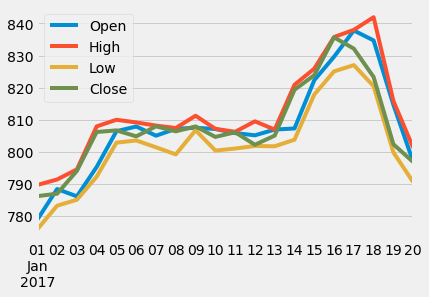

In [4]:
plt.style.use("fivethirtyeight")
google.plot(); plt.show()

### Playing with Ax object:

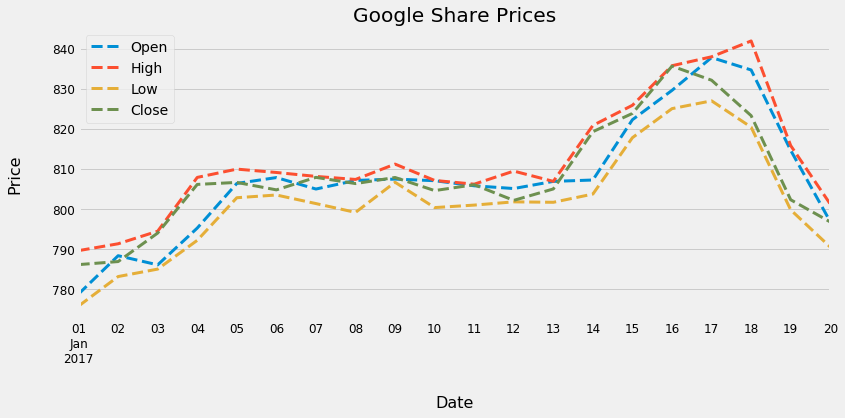

In [9]:
ax = google.plot(figsize = (12, 5), fontsize = 12, linewidth = 3, linestyle = "--")

ax.set_xlabel("Date", fontsize = 16, labelpad = 30)
ax.set_ylabel("Price", fontsize = 16, labelpad = 30)

ax.set_title("Google Share Prices")

plt.show()

### Slicing Time-Series Data: 

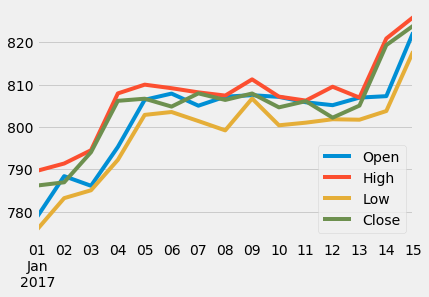

In [12]:
google_subset = google["2017-01-01": "2017-01-15"]

ax = google_subset.plot(fontsize = 14)

### Adding Markers:

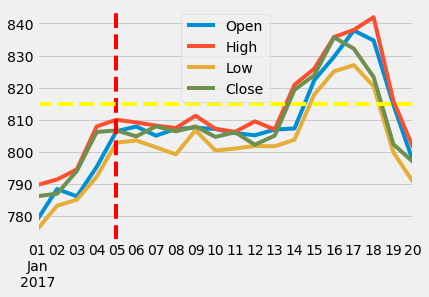

In [15]:
ax = google.plot(fontsize = 14)

ax.axvline(x = "2017-01-05", color = "red", linestyle = "--")
ax.axhline(y = 815, color = "yellow", linestyle = "--")

plt.show()

### Highlight Regions:

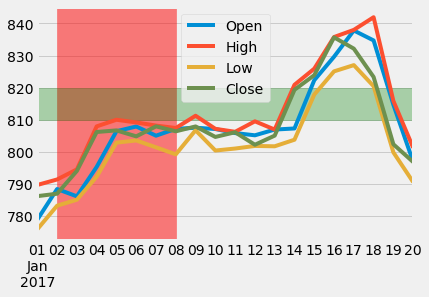

In [18]:
ax = google.plot(fontsize = 14)

ax.axvspan(xmin = "2017-01-02", xmax = "2017-01-08", color = "red", alpha = 0.5)
ax.axhspan(ymin = 810, ymax = 820, color = "green", alpha = 0.3)

plt.show()

### Plot Aggregates:

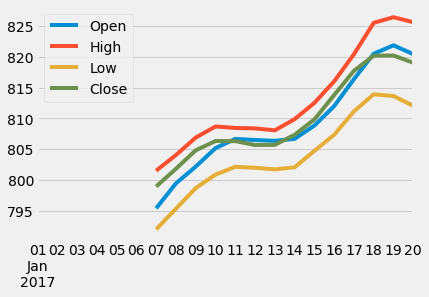

In [20]:
google_mean = google.rolling(window = 7).mean()

ax = google_mean.plot(); plt.show()

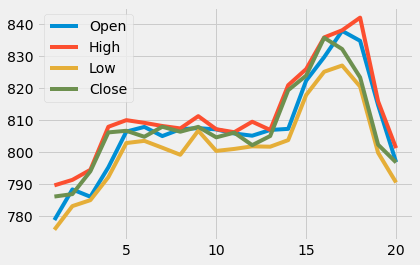

In [24]:
index_day = google.index.day

google_day = google.groupby(index_day).mean()
ax = google_day.plot()
plt.show()

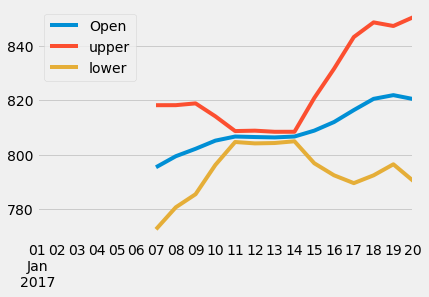

In [26]:
google1 = google[["Open"]]

ma = google1.rolling(window = 7).mean()
mstd = google1.rolling(window = 7).std()

ma["upper"] = ma["Open"] + (2 * mstd["Open"])
ma["lower"] = ma["Open"] - (2 * mstd["Open"])

ax = ma.plot(); plt.show()

### Summary Statistics:

In [27]:
google1.describe()

,Open
count,20.000000
mean,807.526000
std,15.125428
min,778.810000
25%,802.965000
50%,806.995000
75%,809.560000
max,837.810000


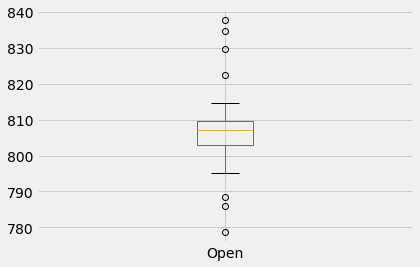

In [29]:
ax = google1.boxplot()
plt.show()

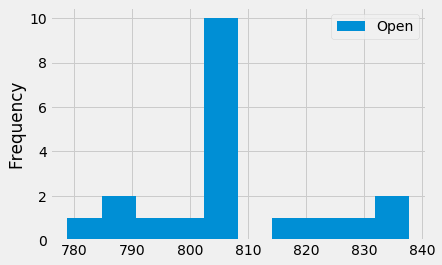

In [33]:
ax2 = google1.plot(kind = "hist", bins = 10)
plt.show()

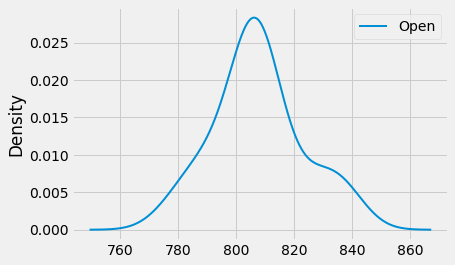

In [34]:
ax3 = google1.plot(kind = "density", linewidth = 2)
plt.show()

### Decomposition of Time-Series:

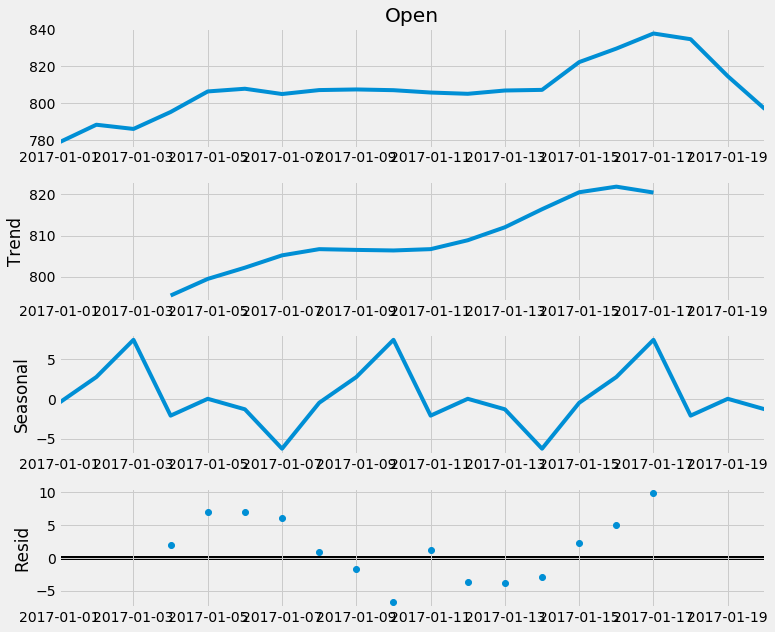

In [36]:
rcParams["figure.figsize"] = 11,9

decomposition = sm.tsa.seasonal_decompose(google["Open"])
fig = decomposition.plot()
plt.show()

In [40]:
print(decomposition.seasonal)
print(decomposition.trend)
print(decomposition.resid)

2017-01-01   -0.491837
2017-01-02    2.748163
2017-01-03    7.428878
2017-01-04   -2.110408
2017-01-05    0.008163
2017-01-06   -1.313980
2017-01-07   -6.268980
2017-01-08   -0.491837
2017-01-09    2.748163
2017-01-10    7.428878
2017-01-11   -2.110408
2017-01-12    0.008163
2017-01-13   -1.313980
2017-01-14   -6.268980
2017-01-15   -0.491837
2017-01-16    2.748163
2017-01-17    7.428878
2017-01-18   -2.110408
2017-01-19    0.008163
2017-01-20   -1.313980
Freq: D, Name: seasonal, dtype: float64
2017-01-01           NaN
2017-01-02           NaN
2017-01-03           NaN
2017-01-04    795.395714
2017-01-05    799.442857
2017-01-06    802.174286
2017-01-07    805.174286
2017-01-08    806.681429
2017-01-09    806.498571
2017-01-10    806.362857
2017-01-11    806.684286
2017-01-12    808.850000
2017-01-13    812.012857
2017-01-14    816.402857
2017-01-15    820.531429
2017-01-16    821.894286
2017-01-17    820.458571
2017-01-18           NaN
2017-01-19           NaN
2017-01-20           NaN


### Multiple Time-Series:

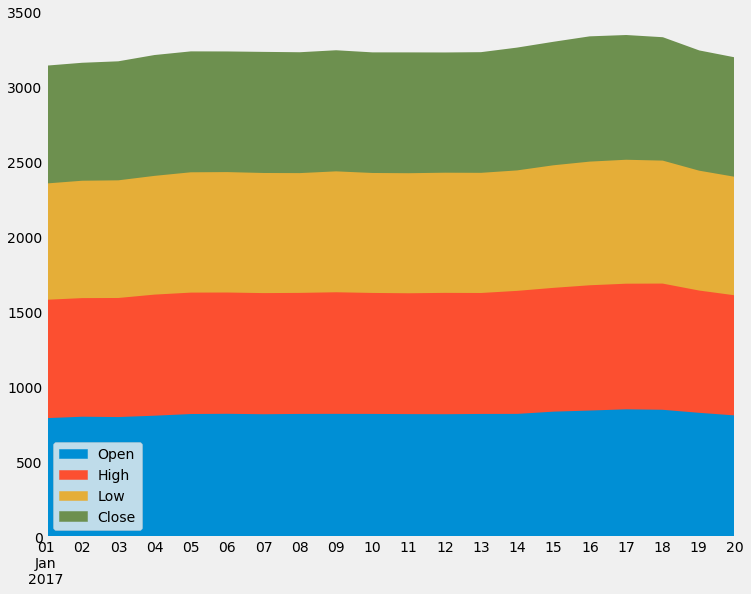

In [41]:
google.plot.area(); plt.show()

### Plot with Describe Table:

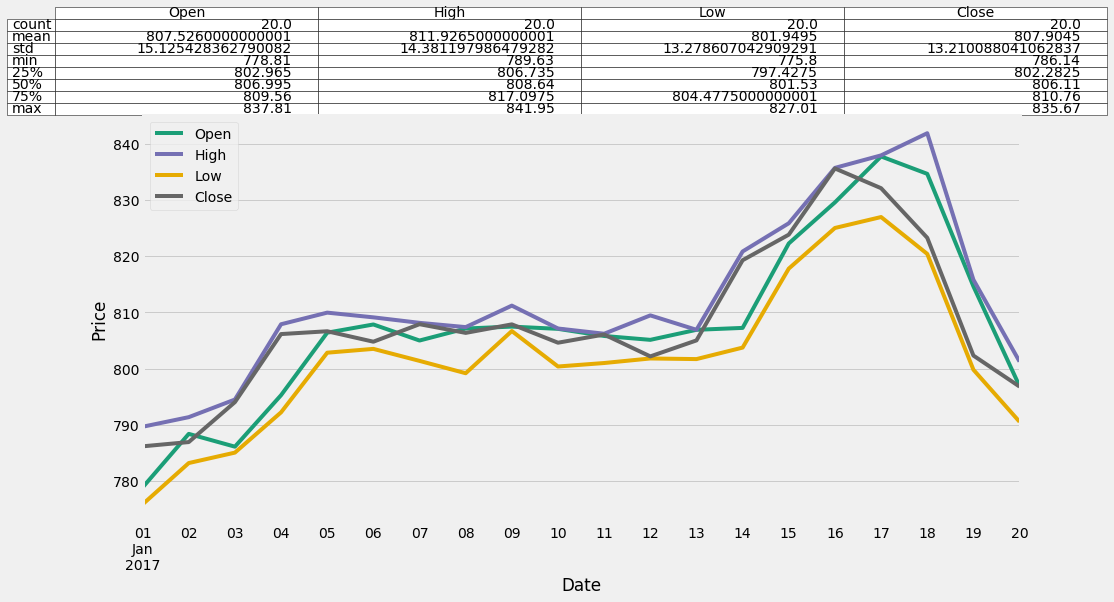

In [43]:
ax = google.plot(colormap = "Dark2", figsize = (14, 7))
summary = google.describe()

ax.table(cellText = summary.values,
        colWidths = [0.3]*len(google.columns),
        rowLabels = summary.index,
        colLabels = summary.columns,
        loc = "top")

ax.set_xlabel("Date")
ax.set_ylabel("Price")

plt.show()

### Facet Plot:

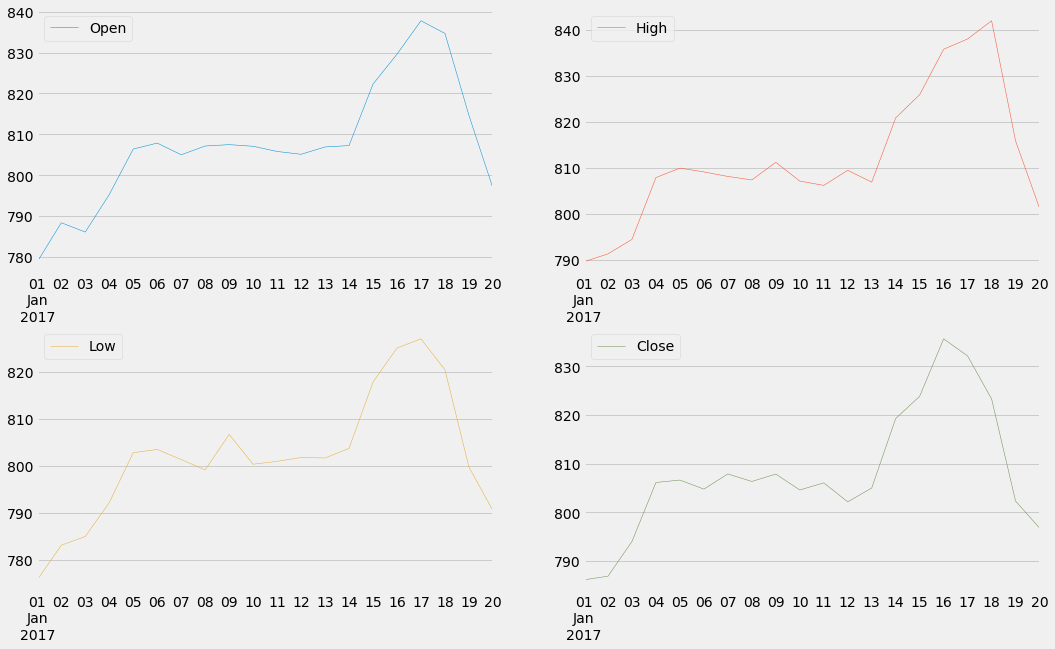

In [45]:
google.plot(subplots = True, linewidth = 0.5, layout = (2, 2), figsize = (16, 10), sharex = False, sharey = False)
plt.show()

## Find Relationship Between Time-Series:

- Pearson: When Linear
- Kendall Tau/Spearman: When Non-Linear

In [48]:
pearsonr(google.Open, google.Close)

(0.9076900443427511, 3.293133839666831e-08)

In [49]:
spearmanr(google.Open, google.Close)

SpearmanrResult(correlation=0.7428571428571428, pvalue=0.00017540444660487062)

In [50]:
kendalltau(google.Open, google.Close)

KendalltauResult(correlation=0.5684210526315789, pvalue=0.0002659445477346318)

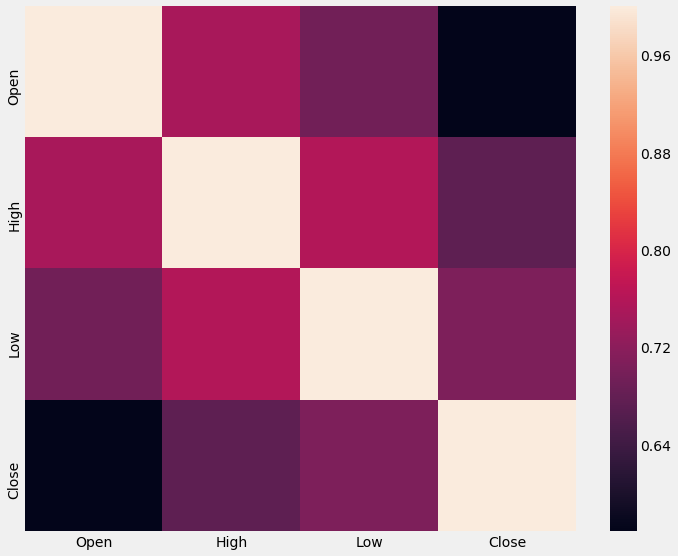

In [51]:
corr_matrix = google.corr(method = "kendall")

sns.heatmap(corr_matrix)

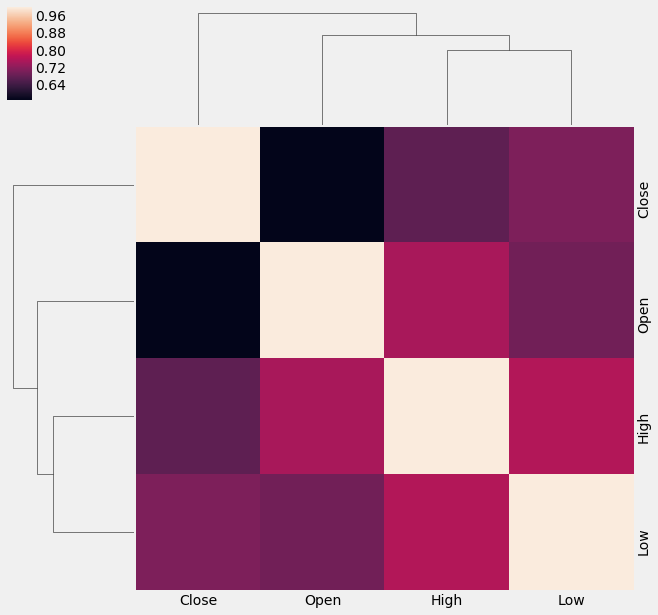

In [52]:
sns.clustermap(corr_matrix)

### Dict to DataFrame:

In [56]:
mydict = {"okan": [173],
          "enes": [174]}

mydata = pd.DataFrame.from_dict(mydict)
mydata

,okan,enes
0,173,174
